In [18]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [19]:
np.random.seed(44)
bank = pd.read_csv("~/banking_data.csv")
#bank.head()
min_max_scaler = preprocessing.MinMaxScaler()

bankX = bank.drop("Bankrupt", 1).copy().values
bankY = bank["Bankrupt"].copy().values
bank_x_df = bank.drop("Bankrupt",1)

bankX = min_max_scaler.fit_transform(bankX)
bankX_df = pd.DataFrame(bankX, columns=bank_x_df.columns)

In [20]:
bankX.shape


(6819, 95)

In [5]:
dims_bank = list(range(2,95,1))

C:\Users\kelle\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\kelle\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\kelle\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\kelle\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

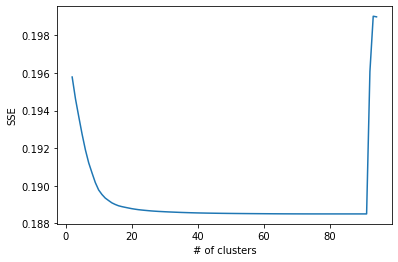

Wall time: 1min 6s


In [8]:
%%time
rc_errors = {}
for dim in dims_bank:
    ica = FastICA(n_components=dim, random_state=44)
    x_prime = ica.fit_transform(bankX_df.values)
    
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(bankX_df.values, reconstructed)    
    rc_errors[dim] = rc_err
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
plt.xlabel("# of clusters")
plt.ylabel("SSE")
plt.show()

In [21]:
%%time

comp = 40
ica = FastICA(n_components=comp, random_state=44, max_iter=1000)
ica_result = ica.fit_transform(bankX_df.values)
for i in range(comp):
    field_name = "ica-"+str(i)
    bankX_df[field_name] = ica_result[:,i]
    bank[field_name] = ica_result[:,i]
bankX_ica_40 = ica_result

Wall time: 326 ms


In [22]:
ica_result.shape


(6819, 40)

In [27]:
bankX_df.head()

,ROA_C_beforeinterestanddepreciationbeforeinterest,ROA_A_beforeinterestandPRCTaftertax,ROA_B_beforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,Pre-taxnetInterestRate,After-taxnetInterestRate,Non-industryincomeandexpenditure/revenue,Continuousinterestrate_aftertax_,...,ica-70,ica-71,ica-72,ica-73,ica-74,ica-75,ica-76,ica-77,ica-78,ica-79
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,-0.035220,-0.000183,0.000421,-0.001014,-0.013188,0.011290,0.008532,-0.000206,-0.005123,-0.019638
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,-0.001749,0.000193,-0.000072,0.003739,-0.000921,-0.022855,0.006439,0.000373,0.004029,-0.007050
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.007994,-0.000081,-0.000223,0.020527,-0.001031,0.002777,-0.006786,-0.000545,0.008424,0.015806
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,-0.007542,0.000347,0.000268,-0.010483,-0.001434,-0.020128,-0.040668,0.000404,-0.003120,0.000565
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,-0.000088,0.000309,0.000143,-0.007507,0.004156,0.008284,0.005020,-0.000225,-0.000961,-0.005234


In [31]:
rndperm = np.random.permutation(bank.shape[0])

<AxesSubplot:xlabel='ica-0', ylabel='ica-1'>

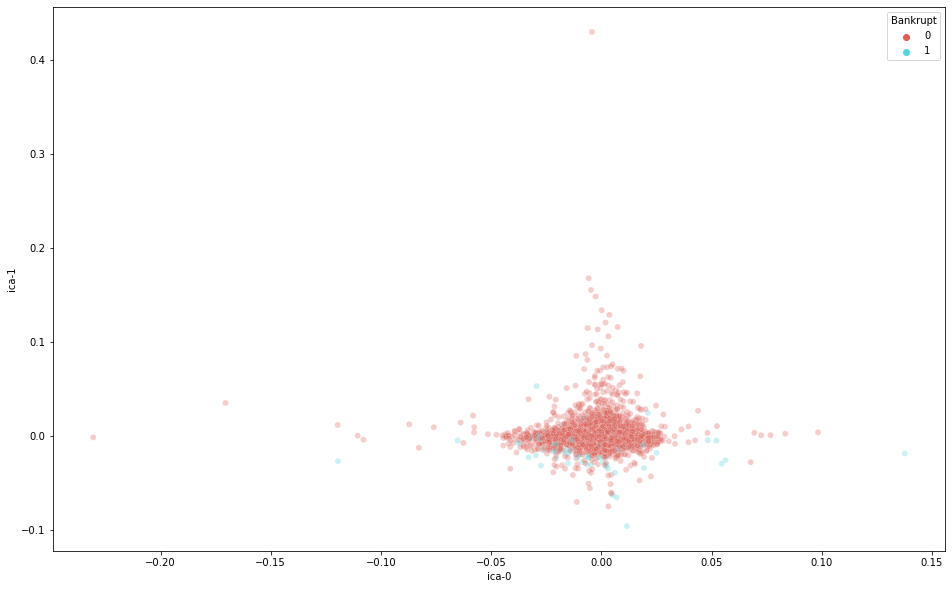

In [35]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="ica-0", y="ica-1",
    hue="Bankrupt",
    palette=sns.color_palette("hls", 2),
    data=bank,
    legend="full",
    alpha=0.3
)

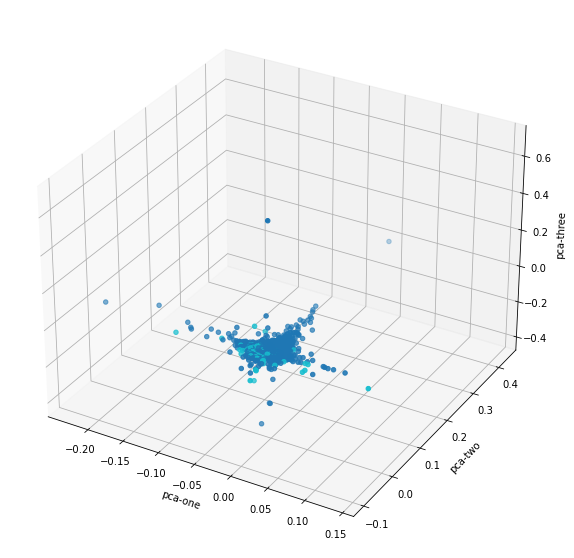

In [37]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=bank.loc[rndperm,:]["ica-0"], 
    ys=bank.loc[rndperm,:]["ica-1"], 
    zs=bank.loc[rndperm,:]["ica-2"], 
    c=bank.loc[rndperm,:]["Bankrupt"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [38]:
from sklearn.cluster import KMeans
clusters = list(range(2,31,1))

C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=2, The Silhouette Coefficient is 0.8853819303039313
For n_clusters=2, The homogeneity_score is 3.3746887024118834e-05


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=3, The Silhouette Coefficient is 0.0855981796141663
For n_clusters=3, The homogeneity_score is 0.0024879960663360817


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=4, The Silhouette Coefficient is 0.0803418977493951
For n_clusters=4, The homogeneity_score is 0.0021101573092876342


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=5, The Silhouette Coefficient is 0.08167588426150739
For n_clusters=5, The homogeneity_score is 0.01799627807246881


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=6, The Silhouette Coefficient is 0.7055100760179935
For n_clusters=6, The homogeneity_score is 0.0006082151072409558


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=7, The Silhouette Coefficient is 0.08225505212350084
For n_clusters=7, The homogeneity_score is 0.017630559352170328


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=8, The Silhouette Coefficient is 0.019617739952986154
For n_clusters=8, The homogeneity_score is 0.00598519004068427


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=9, The Silhouette Coefficient is 0.02080459354777553
For n_clusters=9, The homogeneity_score is 0.006398257818760654


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=10, The Silhouette Coefficient is 0.020441088867416694
For n_clusters=10, The homogeneity_score is 0.025084171018657047


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=11, The Silhouette Coefficient is 0.02329747003643511
For n_clusters=11, The homogeneity_score is 0.013684331044978602


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=12, The Silhouette Coefficient is 0.07049729245426334
For n_clusters=12, The homogeneity_score is 0.01752291475272769


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=13, The Silhouette Coefficient is 0.023493172552149014
For n_clusters=13, The homogeneity_score is 0.02853828867637806


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=14, The Silhouette Coefficient is 0.015116946466925244
For n_clusters=14, The homogeneity_score is 0.03111839904869555


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=15, The Silhouette Coefficient is 0.07274016252116228
For n_clusters=15, The homogeneity_score is 0.02217430852727301


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=16, The Silhouette Coefficient is 0.05044039787466993
For n_clusters=16, The homogeneity_score is 0.01896027388779487


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=17, The Silhouette Coefficient is 0.05142322868605803
For n_clusters=17, The homogeneity_score is 0.019133821508055385


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=18, The Silhouette Coefficient is 0.052672395189804266
For n_clusters=18, The homogeneity_score is 0.01921466729320813


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=19, The Silhouette Coefficient is 0.01754601962746616
For n_clusters=19, The homogeneity_score is 0.028180897982507606


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=20, The Silhouette Coefficient is 0.01747533336814824
For n_clusters=20, The homogeneity_score is 0.027563291735991445


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=21, The Silhouette Coefficient is 0.03157117441025285
For n_clusters=21, The homogeneity_score is 0.02919137435659374


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=22, The Silhouette Coefficient is 0.013262520313117943
For n_clusters=22, The homogeneity_score is 0.02534081720853055


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=23, The Silhouette Coefficient is 0.015767725652419618
For n_clusters=23, The homogeneity_score is 0.028801852176557858


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=24, The Silhouette Coefficient is 0.007526536839105989
For n_clusters=24, The homogeneity_score is 0.03285597083040966


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=25, The Silhouette Coefficient is 0.00924423073196133
For n_clusters=25, The homogeneity_score is 0.036180896364263845


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=26, The Silhouette Coefficient is 0.008674474741443453
For n_clusters=26, The homogeneity_score is 0.03888482561019578


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=27, The Silhouette Coefficient is 0.01068053691977842
For n_clusters=27, The homogeneity_score is 0.042842043623403124


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=28, The Silhouette Coefficient is 0.014978499570123309
For n_clusters=28, The homogeneity_score is 0.04499347400667631


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=29, The Silhouette Coefficient is 0.011267027309489905
For n_clusters=29, The homogeneity_score is 0.044768927873092106


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters=30, The Silhouette Coefficient is 0.010518003860412364
For n_clusters=30, The homogeneity_score is 0.046437381613188444


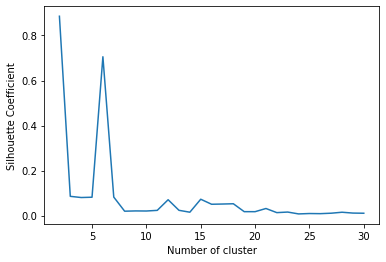

Wall time: 1min 24s


In [39]:
%%time
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
silh = {}
homog = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(bankX_ica_80)
    label = kmeans.labels_
    sil_coeff = silhouette_score(bankX_ica_80, label, metric='euclidean')
    homog_score = homogeneity_score(bankY, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.5423531867648241
For n_clusters=2, The homogeneity_score is 0.03496934001977172
For n_clusters=2, The log_likelihood score is 327.71107551831085
For n_clusters=3, The Silhouette Coefficient is 0.29606989674059137
For n_clusters=3, The homogeneity_score is 0.034360050787670265
For n_clusters=3, The log_likelihood score is 338.09262209660676
For n_clusters=4, The Silhouette Coefficient is 0.2842036645351031
For n_clusters=4, The homogeneity_score is 0.038226457709018315
For n_clusters=4, The log_likelihood score is 340.58243655724425
For n_clusters=5, The Silhouette Coefficient is 0.25033086634791357
For n_clusters=5, The homogeneity_score is 0.046294698835398496
For n_clusters=5, The log_likelihood score is 344.90992456258795
For n_clusters=6, The Silhouette Coefficient is 0.24888095850484604
For n_clusters=6, The homogeneity_score is 0.05276060884739283
For n_clusters=6, The log_likelihood score is 346.0769364936034
For n_clusters=7, Th

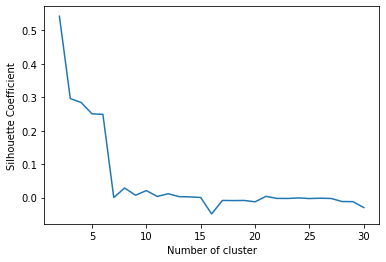

Wall time: 16min 49s


In [42]:
%%time
from sklearn.mixture import GaussianMixture
silh_EM = {}
homog_EM = {}
log_likelihood_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(bankX_ica_80)
    label = gmm.predict(bankX_ica_80)
    sil_coeff = silhouette_score(bankX_ica_80, label, metric='euclidean')
    homog_score = homogeneity_score(bankY, label)
    silh_EM[cluster] = sil_coeff
    homog_EM[cluster] = homog_score
    log_likelihood_EM[cluster] = gmm.score(bankX_ica_80)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [35]:
%%time
best_net = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=75, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Wall time: 0 ns


In [32]:
from sklearn.metrics import confusion_matrix
best_net.fit(X_train, y_train)
test_predictions = best_net.predict(X_test)
print(classification_report(y_test, test_predictions, digits=5))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           0    0.96963   0.99679   0.98302      2178
           1    0.41667   0.06849   0.11765        73

    accuracy                        0.96668      2251
   macro avg    0.69315   0.53264   0.55033      2251
weighted avg    0.95170   0.96668   0.95496      2251

[[2171    7]
 [  68    5]]


In [45]:
%time
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_net, bankX_ica_40, bankY,
                         scoring="f1_weighted", cv=10)
scores, scores.mean()

(array([0.96100531, 0.96002826, 0.94948106, 0.94110903, 0.95871851,
        0.96398575, 0.96398575, 0.95774331, 0.96247137, 0.96992438]),
 0.9588452730338843)

In [31]:
%%time
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bankX_ica_40, 
                                                    bankY, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify=bankY)

Wall time: 4.99 ms


In [26]:
# stratified cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X[train_index, :]
            train_y_folds = train_y[train_index]
            test_X_fold = train_X[test_index, :]
            test_y_fold = train_y[test_index]
            classifier.fit(train_X_folds, train_y_folds)
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Wall time: 5min 52s


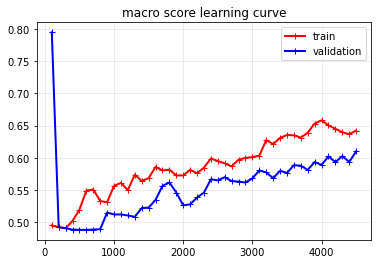

In [36]:
%%time
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net, f1_score, 
                      average="macro")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="macro score learning curve")

In [37]:
from sklearn.metrics import confusion_matrix
best_net.fit(X_train, y_train)
test_predictions = best_net.predict(X_test)
print(classification_report(y_test, test_predictions, digits=5))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           0    0.97004   0.99587   0.98278      2178
           1    0.40000   0.08219   0.13636        73

    accuracy                        0.96624      2251
   macro avg    0.68502   0.53903   0.55957      2251
weighted avg    0.95155   0.96624   0.95533      2251

[[2169    9]
 [  67    6]]


Compare against assignment #1


In [ ]:
%%time
best_net = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

HR dataset

In [11]:
HR = pd.read_csv("~//Documents//Assignment3//HR_data.csv")
HR_orig = pd.read_csv("~//Documents//Assignment3//HR_data.csv")

from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

HR['city']=HR['city'].astype(str)
HR['gender']=HR['gender'].astype(str)
HR['relevent_experience']=HR['relevent_experience'].astype(str)
HR['enrolled_university']=HR['enrolled_university'].astype(str)
HR['education_level']=HR['education_level'].astype(str)
HR['major_discipline']=HR['major_discipline'].astype(str)
HR['experience']=HR['experience'].astype(str)
HR['company_size']=HR['company_size'].astype(str)
HR['company_type']=HR['company_type'].astype(str)
HR['last_new_job']=HR['last_new_job'].astype(str)
HR = MultiColumnLabelEncoder(columns = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']).fit_transform(HR)


In [12]:
hrX = HR.drop("target", 1).copy().values
hrY = HR["target"].copy().values
hr_x_df = HR.drop("target",1)
min_max_scaler = preprocessing.MinMaxScaler()
hrX = min_max_scaler.fit_transform(hrX)
hrX_df = pd.DataFrame(hrX, columns=hr_x_df.columns)

In [15]:
dims_hr = list(range(1,15,1))

C:\Users\kelle\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\kelle\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


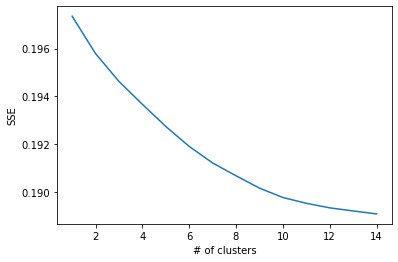

Wall time: 2.29 s


In [16]:
%%time
rc_errors = {}
for dim in dims_hr:
    ica = FastICA(n_components=dim, random_state=44)
    x_prime = ica.fit_transform(bankX_df.values)
    
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(bankX_df.values, reconstructed)    
    rc_errors[dim] = rc_err
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
plt.xlabel("# of clusters")
plt.ylabel("SSE")
plt.show()